In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
od=pd.read_csv('C:\\Users\\HP\\Documents\\Data Science\\Python\\E-Commerce_Orders.csv')

In [3]:
od

,Customer ID,Order ID,Product,Units Sold,Date,Revenue,Cost
0,3,266868,Chocolate Chip,292,2/1/2020,1460.0,584.00
1,3,140794,Chocolate Chip,974,2/1/2020,4870.0,1948.00
2,3,684759,Chocolate Chip,"2,518",6/1/2020,12590.0,5036.00
3,4,640447,Chocolate Chip,"1,006",6/1/2020,5030.0,2012.00
4,2,898637,Chocolate Chip,367,7/1/2020,1835.0,734.00
...,...,...,...,...,...,...,...
695,3,853295,White Chocolate Macadamia Nut,"2,826",5/1/2020,16956.0,7771.50
696,2,253981,White Chocolate Macadamia Nut,663,9/1/2020,3978.0,1823.25
697,4,208456,White Chocolate Macadamia Nut,"2,574",11/1/2019,15444.0,7078.50
698,4,727940,White Chocolate Macadamia Nut,"2,438",12/1/2019,14628.0,6704.50


In [4]:
od.columns

Index(['Customer ID', 'Order ID', 'Product', 'Units Sold', 'Date', 'Revenue',
       'Cost'],
      dtype='object')

In [5]:
od.shape

(700, 7)

In [6]:
od.dtypes

Customer ID      int64
Order ID         int64
Product         object
Units Sold      object
Date            object
Revenue        float64
Cost           float64
dtype: object

In [7]:
od.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
695    False
696    False
697    False
698    False
699    False
Length: 700, dtype: bool

In [8]:
od.isnull().sum()

Customer ID    0
Order ID       0
Product        0
Units Sold     0
Date           0
Revenue        0
Cost           0
dtype: int64

In [9]:
od['Units Sold']=od['Units Sold'].str.replace(',', '').astype(float)

In [10]:
od.head()

,Customer ID,Order ID,Product,Units Sold,Date,Revenue,Cost
0,3,266868,Chocolate Chip,292.0,2/1/2020,1460.0,584.0
1,3,140794,Chocolate Chip,974.0,2/1/2020,4870.0,1948.0
2,3,684759,Chocolate Chip,2518.0,6/1/2020,12590.0,5036.0
3,4,640447,Chocolate Chip,1006.0,6/1/2020,5030.0,2012.0
4,2,898637,Chocolate Chip,367.0,7/1/2020,1835.0,734.0


In [11]:
#Removing outliers based on the IQR method for numeric columns
numeric_cols=['Customer ID', 'Order ID', 'Product', 'Units Sold', 'Date', 'Revenue',
       'Cost']

In [12]:
Q1 = od[numeric_cols].quantile(0.25)
Q3 = od[numeric_cols].quantile(0.75) 
IQR= Q3-Q1

In [13]:
Q1

Customer ID         2.000
Order ID       296211.500
Units Sold        905.000
Revenue          2854.000
Cost             1234.375
Name: 0.25, dtype: float64

In [14]:
Q3

Customer ID         4.00
Order ID       710704.25
Units Sold       2229.50
Revenue          9580.00
Cost             3925.70
Name: 0.75, dtype: float64

In [15]:
IQR

Customer ID         2.000
Order ID       414492.750
Units Sold       1324.500
Revenue          6726.000
Cost             2691.325
dtype: float64

In [16]:
#Defining a threshold to identify outliers
threshold=1.5

In [17]:
outlier_mask=((od[numeric_cols]<(Q1 - threshold*IQR)) | (od[numeric_cols]>(Q3+threshold*IQR))).any(axis=1)

In [18]:
outlier_mask.iloc[:20]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19     True
dtype: bool

In [19]:
od_cleaned=od[~outlier_mask]

In [20]:
od_cleaned.shape

(688, 7)

In [21]:
od.head()

,Customer ID,Order ID,Product,Units Sold,Date,Revenue,Cost
0,3,266868,Chocolate Chip,292.0,2/1/2020,1460.0,584.0
1,3,140794,Chocolate Chip,974.0,2/1/2020,4870.0,1948.0
2,3,684759,Chocolate Chip,2518.0,6/1/2020,12590.0,5036.0
3,4,640447,Chocolate Chip,1006.0,6/1/2020,5030.0,2012.0
4,2,898637,Chocolate Chip,367.0,7/1/2020,1835.0,734.0


In [22]:
#To group the data by the "product" column
product_group = od.groupby('Product')

In [23]:
product_summary = product_group.agg({
    'Units Sold' : 'sum',
    'Revenue': 'sum',
    'Cost': 'sum'})

In [24]:
product_summary

,Units Sold,Revenue,Cost
Product,,,
Chocolate Chip,338243.0,1691197.5,676479.000
Fortune Cookie,154201.0,154198.0,77099.000
Oatmeal Raisin,155318.0,776575.0,341693.000
Snickerdoodle,146849.0,587384.0,220269.000
Sugar,168787.0,506349.0,210978.750
White Chocolate Macadamia Nut,162426.0,974547.0,446667.375


In [25]:
#To calculate profit margin in percentage
product_summary['Profit Margin'] = ((product_summary['Revenue'] - product_summary['Cost']) / product_summary['Revenue']) * 100

In [26]:
product_summary['Profit Margin'] 

Product
Chocolate Chip                   60.000000
Fortune Cookie                   50.000000
Oatmeal Raisin                   56.000000
Snickerdoodle                    62.500000
Sugar                            58.333333
White Chocolate Macadamia Nut    54.166667
Name: Profit Margin, dtype: float64

In [27]:
#Sorting the products by revenue and units sold to find the best sellers
best_sellers_by_revenue = product_summary.sort_values(by='Revenue', ascending=False)
best_sellers_by_units_sold = product_summary.sort_values(by='Units Sold', ascending=False)

In [28]:
best_sellers_by_revenue

,Units Sold,Revenue,Cost,Profit Margin
Product,,,,
Chocolate Chip,338243.0,1691197.5,676479.000,60.000000
White Chocolate Macadamia Nut,162426.0,974547.0,446667.375,54.166667
Oatmeal Raisin,155318.0,776575.0,341693.000,56.000000
Snickerdoodle,146849.0,587384.0,220269.000,62.500000
Sugar,168787.0,506349.0,210978.750,58.333333
Fortune Cookie,154201.0,154198.0,77099.000,50.000000


In [29]:
best_sellers_by_units_sold

,Units Sold,Revenue,Cost,Profit Margin
Product,,,,
Chocolate Chip,338243.0,1691197.5,676479.000,60.000000
Sugar,168787.0,506349.0,210978.750,58.333333
White Chocolate Macadamia Nut,162426.0,974547.0,446667.375,54.166667
Oatmeal Raisin,155318.0,776575.0,341693.000,56.000000
Fortune Cookie,154201.0,154198.0,77099.000,50.000000
Snickerdoodle,146849.0,587384.0,220269.000,62.500000


In [30]:
od

,Customer ID,Order ID,Product,Units Sold,Date,Revenue,Cost
0,3,266868,Chocolate Chip,292.0,2/1/2020,1460.0,584.00
1,3,140794,Chocolate Chip,974.0,2/1/2020,4870.0,1948.00
2,3,684759,Chocolate Chip,2518.0,6/1/2020,12590.0,5036.00
3,4,640447,Chocolate Chip,1006.0,6/1/2020,5030.0,2012.00
4,2,898637,Chocolate Chip,367.0,7/1/2020,1835.0,734.00
...,...,...,...,...,...,...,...
695,3,853295,White Chocolate Macadamia Nut,2826.0,5/1/2020,16956.0,7771.50
696,2,253981,White Chocolate Macadamia Nut,663.0,9/1/2020,3978.0,1823.25
697,4,208456,White Chocolate Macadamia Nut,2574.0,11/1/2019,15444.0,7078.50
698,4,727940,White Chocolate Macadamia Nut,2438.0,12/1/2019,14628.0,6704.50


In [31]:
od['Product'].unique()

array(['Chocolate Chip', 'Fortune Cookie', 'Oatmeal Raisin',
       'Snickerdoodle', 'Sugar', 'White Chocolate Macadamia Nut'],
      dtype=object)

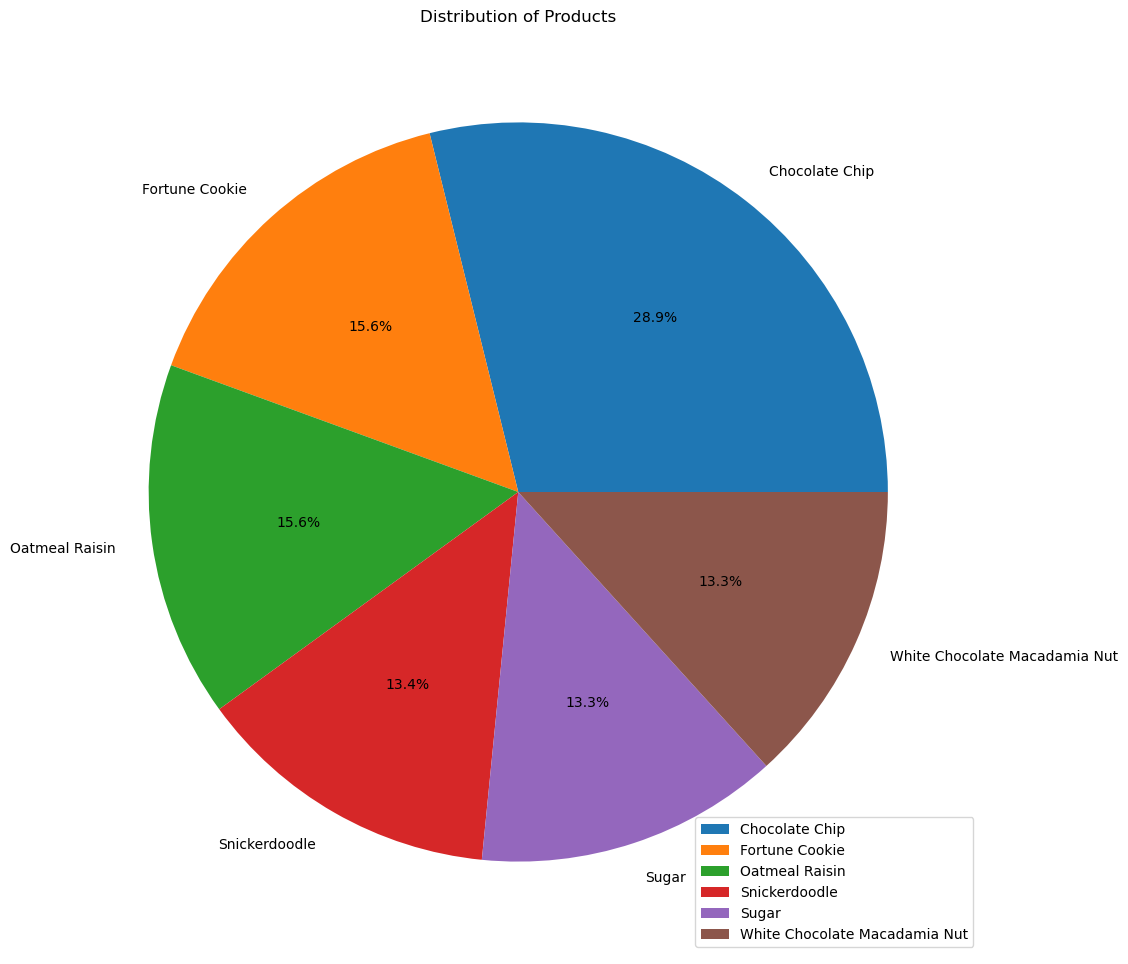

In [32]:
#Explorative Data Analysis Using Matplotlib - Pie Chart
plt.figure(figsize=(12,12))
plt.pie(od['Product'].value_counts(), labels=['Chocolate Chip', 'Fortune Cookie', 'Oatmeal Raisin',
       'Snickerdoodle', 'Sugar', 'White Chocolate Macadamia Nut'], autopct='%1.1f%%')
plt.title('Distribution of Products')
plt.legend(loc='lower right')

plt.show()

Text(0.5, 1.0, 'Count Plot of Products')

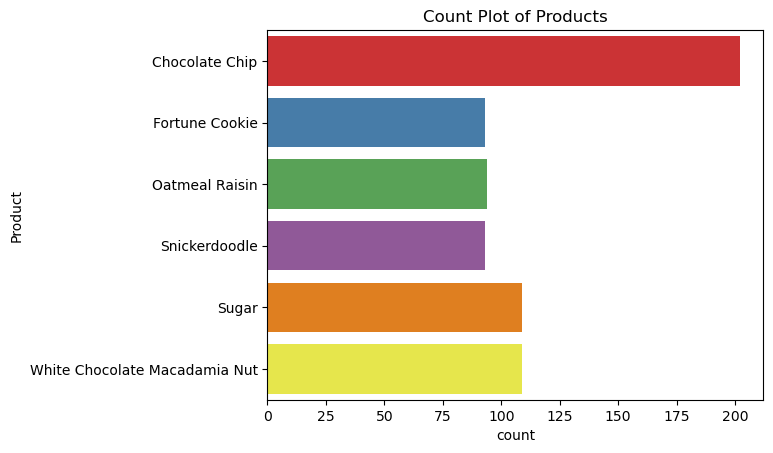

In [33]:
#Count Plot using Seaborn
sns.countplot(od,y='Product',palette="Set1" )
plt.title('Count Plot of Products')

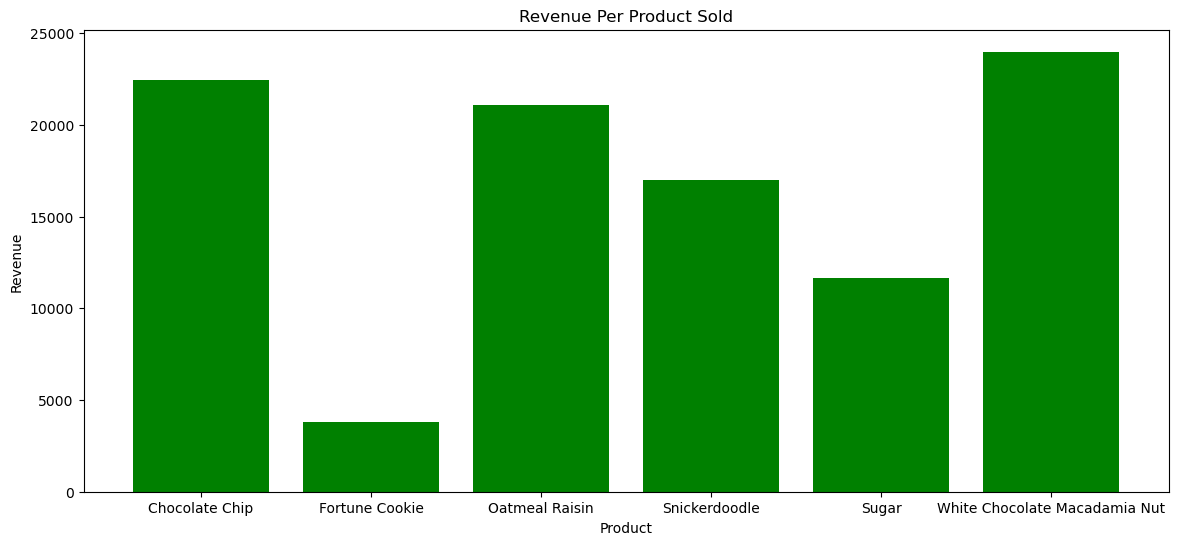

In [34]:
#Bar chart
plt.figure(figsize=(14,6))
plt.bar(od['Product'],od['Revenue'],color='green')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue Per Product Sold')
plt.show()

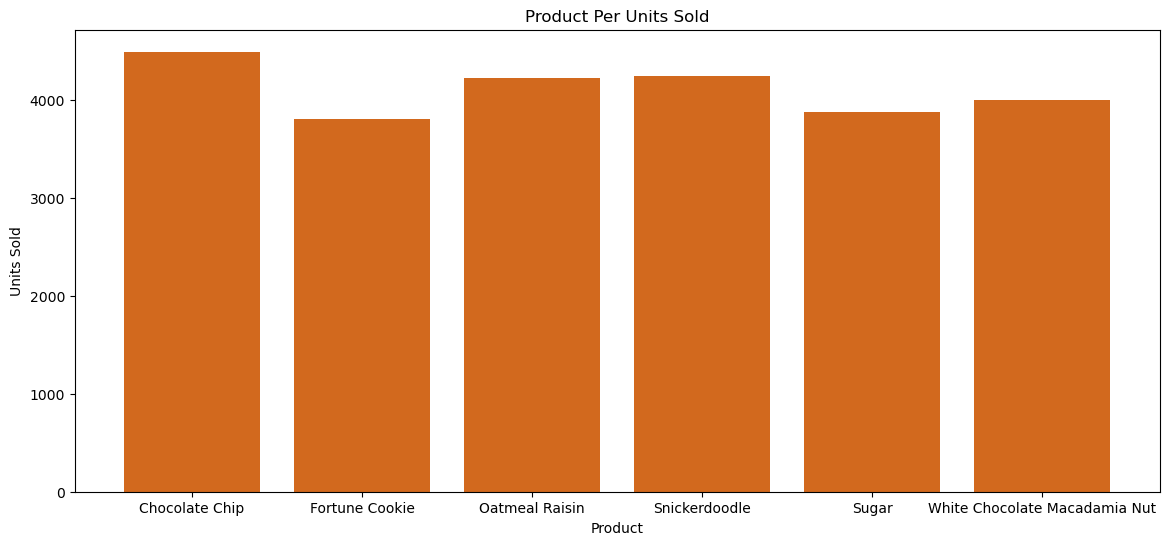

In [35]:
#Bar chart
plt.figure(figsize=(14,6))
plt.bar(od['Product'],od['Units Sold'],color='chocolate')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Product Per Units Sold')
plt.show()

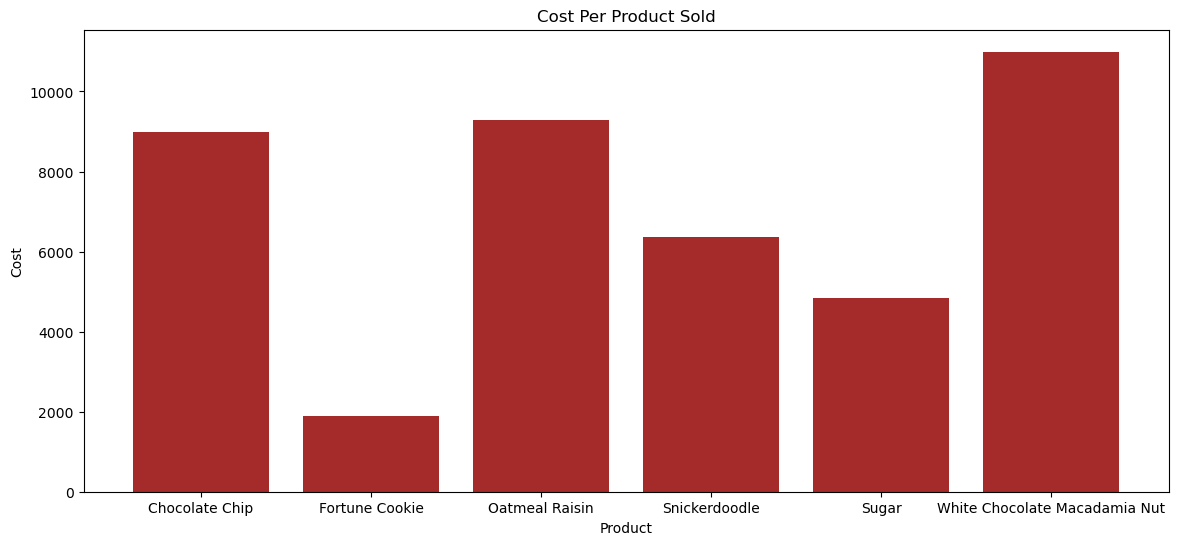

In [36]:
#Bar chart
plt.figure(figsize=(14,6))
plt.bar(od['Product'],od['Cost'],color='brown')
plt.xlabel('Product')
plt.ylabel('Cost')
plt.title('Cost Per Product Sold')
plt.show()